In [43]:
import numpy as np 
import pandas as pd 

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

In [44]:
# Gets both data sets from relative position in folder and assigns
training = pd.read_csv("./train.csv")
testing = pd.read_csv("./test.csv")

# Displays training in table
# Things to note: NaN values in age and cabin.
# AGE: Need to fill the values (imputation)
# Cabin No: Not a good predictor and too many NaN, so drop 
training.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
# Gives simple information regarding training set
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [46]:
# Creates a function that reads table colmn names and counts null values
def null_table(training, testing):
    print("Training Data Frame")
    # pandas null counter and column display function
    print(pd.isnull(training).sum()) 
    print(" ")
    print("Testing Data Frame")
    print(pd.isnull(testing).sum())

null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [47]:
# Drop array of tables
# labels = array of columns or indexes / axis = columns 1 or indexes 0 / inplace = True
training.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)
testing.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)

null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


SLIGHTLY SKEWED RIGHT (Meaning right has a long tail / +ve skew)


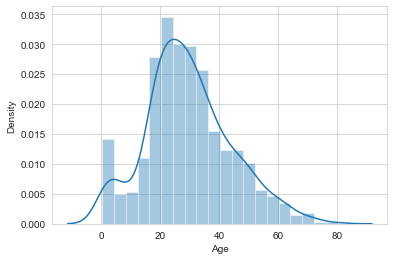

In [48]:
# Check Age column, skewed or symmetrical? Helps determine what value to replace the NaN values.
copy = training.copy()
copy.dropna(inplace = True)
sns.distplot(copy["Age"])
print('SLIGHTLY SKEWED RIGHT (Meaning right has a long tail / +ve skew)')

In [49]:
# +ve skew use median for both sets
# - Find Age Column
# - Fill all Null values
# - With Median
training["Age"].fillna(training["Age"].median(), inplace = True)
testing["Age"].fillna(testing["Age"].median(), inplace = True) 
training["Embarked"].fillna("S", inplace = True)
testing["Fare"].fillna(testing["Fare"].median(), inplace = True)

#Check no more NaN values
null_table(training, testing) 

Training Data Frame
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
 
Testing Data Frame
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


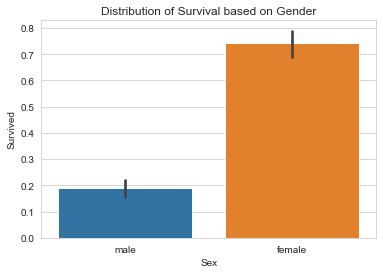

Total people survived is: 342
% of Females who survived: 68.12865497076024
% of Males who survived: 31.871345029239766
Gender appears to be a very good feature to use to predict survival.


In [50]:
# By visualizing, we can see the trends and general associations of variables of training set.
# Make different graphs for each feature to see the entropy and information gain of the feature.

sns.barplot(x="Sex", y="Survived", data=training)
plt.title("Distribution of Survival based on Gender")
plt.show()

# Get out of training set column sex / where sex is female and survived is true / sum them
total_survived_females = training[training.Sex == "female"]["Survived"].sum()
total_survived_males = training[training.Sex == "male"]["Survived"].sum()

print("Total people survived is: " + str((total_survived_females + total_survived_males)))
print("% of Females who survived: " + str(total_survived_females/(total_survived_females + total_survived_males)*100)) 
print("% of Males who survived: " + str(total_survived_males/(total_survived_females + total_survived_males)*100))

print('Gender appears to be a very good feature to use to predict survival.')

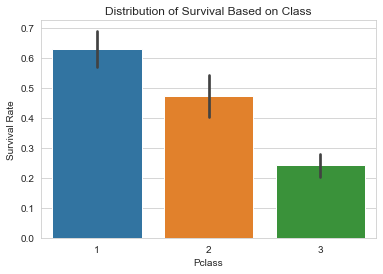

Total people survived is: 342
% of Class 1 Passengers who survived: 39.76608187134503
% of Class 2 Passengers who survived: 25.438596491228072
% of Class 3 Passengers who survived: 34.7953216374269
There is a clear different in class survival rate, a useful feature


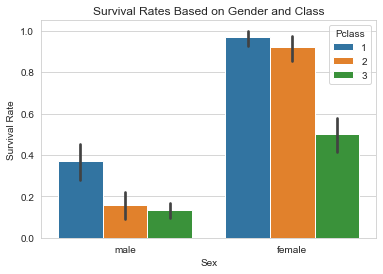

In [51]:
# Now checking class

sns.barplot(x="Pclass", y="Survived", data=training)
plt.ylabel("Survival Rate")
plt.title("Distribution of Survival Based on Class")
plt.show()

# Get out of training set column Pclass / where class is 1 and survived is true / sum them
total_survived_one = training[training.Pclass == 1]["Survived"].sum()
total_survived_two = training[training.Pclass == 2]["Survived"].sum()
total_survived_three = training[training.Pclass == 3]["Survived"].sum()
total_survived_class = total_survived_one + total_survived_two + total_survived_three

print("Total people survived is: " + str(total_survived_class))
print("% of Class 1 Passengers who survived: " + str(total_survived_one/total_survived_class*100)) 
print("% of Class 2 Passengers who survived: " + str(total_survived_two/total_survived_class*100))
print("% of Class 3 Passengers who survived: " + str(total_survived_three/total_survived_class*100))

# Combining both in a bar chart
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=training)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

print('There is a clear different in class survival rate, a useful feature')


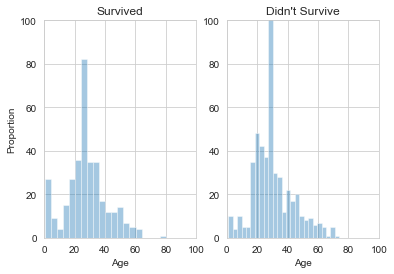

The younger range of ages were more likely to survive


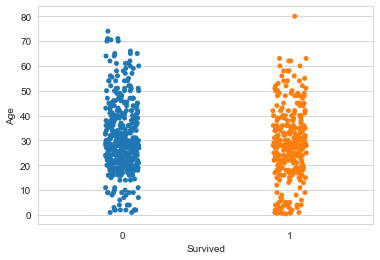

In [52]:
# AGE

#Collect table of all ages of those who survived
survived_ages = training[training.Survived == 1]["Age"]
#Collect table of all ages of those who died
not_survived_ages = training[training.Survived == 0]["Age"]

# create a table for the display subplot(1 row, 2 column (for each table), gives it index 1 )
plt.subplot(1, 2, 1)

# Creates graph distplot(input data, kde(bool): plot a gaussian kernel density estimate)
sns.distplot(survived_ages, kde=False)
# Sets axis for each plot, takes an array
plt.axis([0, 100, 0, 100])
plt.title("Survived")
plt.ylabel("Proportion")

plt.subplot(1, 2, 2)
sns.distplot(not_survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Didn't Survive")
plt.show()


# Draw a scatterplot where one variable is categorical. 
# stripplot(x = x axis data, y = y axis data, jitter(bool): useful when you have many points and they overlap)
sns.stripplot(x="Survived", y="Age", data=training, jitter=True)

print('The younger range of ages were more likely to survive')


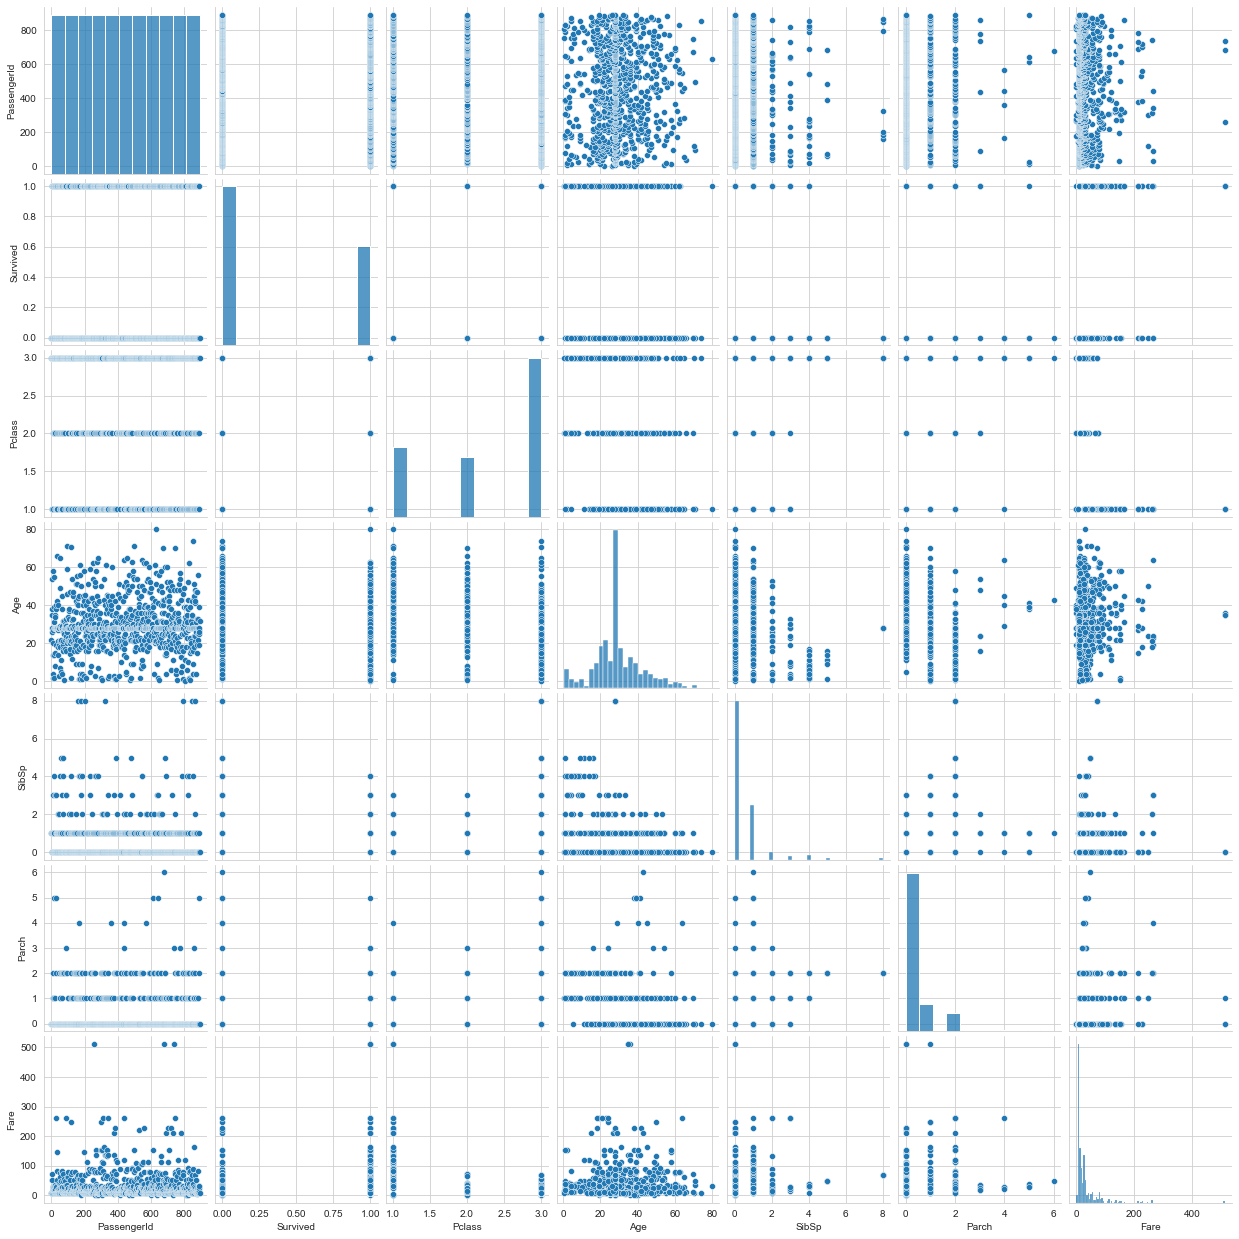

In [53]:
# useful tool for finding trends easily
sns.pairplot(training)

In [57]:
print('Sex and Embarked columns are categorical values, we need to use One-Hot-Encoding to make them numerical values in order to perform our classification with our model.')
print('\nThis is required on both the training and test set')

# .loc meaning locate allows access to each row or column
# in training / go through each row in sex / if = male / then set to 
training.loc[training["Sex"] == "male", "Sex"] = 0
training.loc[training["Sex"] == "female", "Sex"] = 1

training.loc[training["Embarked"] == "S", "Embarked"] = 0
training.loc[training["Embarked"] == "C", "Embarked"] = 1
training.loc[training["Embarked"] == "Q", "Embarked"] = 2

testing.loc[testing["Sex"] == "male", "Sex"] = 0
testing.loc[testing["Sex"] == "female", "Sex"] = 1

testing.loc[testing["Embarked"] == "S", "Embarked"] = 0
testing.loc[testing["Embarked"] == "C", "Embarked"] = 1
testing.loc[testing["Embarked"] == "Q", "Embarked"] = 2
print('\nNotice sex is now a 0 or 1')

# Shows a sample set of data 
testing.sample(10)



Sex and Embarked columns are categorical values, we need to use One-Hot-Encoding to make them numerical values in order to perform our classification with our model.

This is required on both the training and test set

Notice sex is now a 0 or 1


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
349,1241,2,"Walcroft, Miss. Nellie",1,31.0,0,0,21.0000,0
87,979,3,"Badman, Miss. Emily Louisa",1,18.0,0,0,8.0500,0
146,1038,1,"Hilliard, Mr. Herbert Henry",0,27.0,0,0,51.8625,0
241,1133,2,"Christy, Mrs. (Alice Frances)",1,45.0,0,2,30.0000,0
366,1258,3,"Caram, Mr. Joseph",0,27.0,1,0,14.4583,1
94,986,1,"Birnbaum, Mr. Jakob",0,25.0,0,0,26.0000,1
140,1032,3,"Goodwin, Miss. Jessie Allis",1,10.0,5,2,46.9000,0
404,1296,1,"Frauenthal, Mr. Isaac Gerald",0,43.0,1,0,27.7208,1
128,1020,2,"Bowenur, Mr. Solomon",0,42.0,0,0,13.0000,0
229,1121,2,"Hocking, Mr. Samuel James Metcalfe",0,36.0,0,0,13.0000,0


In [59]:
print('SibSp (siblings) and Parch (parents) into one synthetic feature called family size, +1 for the actual person')
# creating new column called FamSize
training["FamSize"] = training["SibSp"] + training["Parch"] + 1
testing["FamSize"] = testing["SibSp"] + testing["Parch"] + 1

print('Creating new column to tell us if they were alone or not')
# Using a lambda function to populate column
training["IsAlone"] = training.FamSize.apply(lambda x: 1 if x == 1 else 0)
testing["IsAlone"] = testing.FamSize.apply(lambda x: 1 if x == 1 else 0)

# Shows a sample set of data 
testing.sample(10)

SibSp (siblings) and Parch (parents) into one synthetic feature called family size, +1 for the actual person
Creating new column to tell us if they were alone or not


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone
180,1072,2,"McCrie, Mr. James Matthew",0,30.00,0,0,13.0000,0,1,1
208,1100,1,"Rosenbaum, Miss. Edith Louise",1,33.00,0,0,27.7208,1,1,1
217,1109,1,"Wick, Mr. George Dennick",0,57.00,1,1,164.8667,0,3,0
76,968,3,"Miles, Mr. Frank",0,27.00,0,0,8.0500,0,1,1
345,1237,3,"Abelseth, Miss. Karen Marie",1,16.00,0,0,7.6500,0,1,1
129,1021,3,"Petersen, Mr. Marius",0,24.00,0,0,8.0500,0,1,1
307,1199,3,"Aks, Master. Philip Frank",0,0.83,0,1,9.3500,0,2,0
332,1224,3,"Thomas, Mr. Tannous",0,27.00,0,0,7.2250,1,1,1
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",1,47.00,1,0,61.1750,0,2,0
218,1110,1,"Widener, Mrs. George Dunton (Eleanor Elkins)",1,50.00,1,1,211.5000,1,3,0


In [60]:
print('Extracting their title "Mr", "Mrs" ext... from the name and creating an encoded title column')

# for each name in training
for name in training["Name"]:
    # the title column = Name
    training["Title"] = training["Name"].str.extract("([A-Za-z]+)\.",expand=True)
    
for name in testing["Name"]:
    testing["Title"] = testing["Name"].str.extract("([A-Za-z]+)\.",expand=True)

# Create an object to replace strings with
title_replacements = {"Mlle": "Other", "Major": "Other", "Col": "Other", "Sir": "Other", "Don": "Other", "Mme": "Other",
          "Jonkheer": "Other", "Lady": "Other", "Capt": "Other", "Countess": "Other", "Ms": "Other", "Dona": "Other", "Rev": "Other", "Dr": "Other"}

training.replace({"Title": title_replacements}, inplace=True)
testing.replace({"Title": title_replacements}, inplace=True)

training.loc[training["Title"] == "Miss", "Title"] = 0
training.loc[training["Title"] == "Mr", "Title"] = 1
training.loc[training["Title"] == "Mrs", "Title"] = 2
training.loc[training["Title"] == "Master", "Title"] = 3
training.loc[training["Title"] == "Other", "Title"] = 4

testing.loc[testing["Title"] == "Miss", "Title"] = 0
testing.loc[testing["Title"] == "Mr", "Title"] = 1
testing.loc[testing["Title"] == "Mrs", "Title"] = 2
testing.loc[testing["Title"] == "Master", "Title"] = 3
testing.loc[testing["Title"] == "Other", "Title"] = 4

# Check there are only 5 entries for title
print(set(training["Title"]))

Extracting their title "Mr", "Mrs" ext... from the name and creating an encoded title column


In [69]:
# IMPORTS

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Performance module
from sklearn.metrics import make_scorer, accuracy_score 

# GridSearch cross validation to find the optimal parameters for the model and predict on our testing set
from sklearn.model_selection import GridSearchCV

# To Split data set
from sklearn.model_selection import train_test_split #to create validation data set

In [70]:
# Create a list of features (column headers)
features = ["Pclass", "Sex", "Age", "Embarked", "Fare", "FamSize", "IsAlone", "Title"]

# Assign features to variables
X_train = training[features] 
y_train = training["Survived"]
X_test = testing[features] 
#we don't have y_test, that is what we're trying to predict with our model

# IT IS EASY TO OVERFIT THESE MODELS so create a validation test set
# train_test_split(X training test to split, Y training test to split, 
# size (float): usually 0.2, random_state (bool): Controls the shuffling applied usually 0 )
X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0) #X_valid and y_valid are the validation sets

In [78]:
# SVC Model
svc_clf = SVC() 
svc_clf.fit(X_training, y_training)
pred_svc = svc_clf.predict(X_valid)
acc_svc = accuracy_score(y_valid, pred_svc)

# Linear SVC
linsvc_clf = LinearSVC()
linsvc_clf.fit(X_training, y_training)
pred_linsvc = linsvc_clf.predict(X_valid)
acc_linsvc = accuracy_score(y_valid, pred_linsvc)

# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_training, y_training)
pred_rf = rf_clf.predict(X_valid)
acc_rf = accuracy_score(y_valid, pred_rf)

# Logistical Regression
logreg_clf = LogisticRegression()
logreg_clf.fit(X_training, y_training)
pred_logreg = logreg_clf.predict(X_valid)
acc_logreg = accuracy_score(y_valid, pred_logreg)


# K-Nearest Neighbours
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_training, y_training)
pred_knn = knn_clf.predict(X_valid)
acc_knn = accuracy_score(y_valid, pred_knn)

gnb_clf = GaussianNB()
gnb_clf.fit(X_training, y_training)
pred_gnb = gnb_clf.predict(X_valid)
acc_gnb = accuracy_score(y_valid, pred_gnb)

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_training, y_training)
pred_dt = dt_clf.predict(X_valid)
acc_dt = accuracy_score(y_valid, pred_dt)

print('SVC accuracy: ' + str(acc_svc * 100))
print('Linear SVC accuracy: ' + str(acc_linsvc * 100))
print('Random Forest accuracy: ' + str(acc_rf * 100))
print('Logistical Regression accuracy: ' + str(acc_logreg * 100))
print('K-Nearest Neighbours accuracy: ' + str(acc_knn * 100))
print('Gaussian NB accuracy: ' + str(acc_gnb * 100))
print('Decusion Tree accuracy: ' + str(acc_dt * 100))

SVC accuracy: 72.62569832402235
Linear SVC accuracy: 80.44692737430168
Random Forest accuracy: 82.12290502793296
Logistical Regression accuracy: 81.00558659217877
K-Nearest Neighbours accuracy: 74.30167597765363
Gaussian NB accuracy: 78.77094972067039
Decusion Tree accuracy: 77.09497206703911


In [79]:
# Performance graphing

model_performance = pd.DataFrame({
    "Model": ["SVC", "Linear SVC", "Random Forest", 
              "Logistic Regression", "K Nearest Neighbors", "Gaussian Naive Bayes",  
              "Decision Tree"],
    "Accuracy": [acc_svc, acc_linsvc, acc_rf, 
              acc_logreg, acc_knn, acc_gnb, acc_dt]
})

model_performance.sort_values(by="Accuracy", ascending=False)

print('Ran a few times and consistently the best is RANDOM FOREST')



Ran a few times and consistently the best is RANDOM FOREST


In [ ]:
print('Tuning the hyperparameters of our Random Forest model.')



rf_clf = RandomForestClassifier()

parameters = {"n_estimators": [4, 5, 6, 7, 8, 9, 10, 15], 
              "criterion": ["gini", "entropy"],
              "max_features": ["auto", "sqrt", "log2"], 
              "max_depth": [2, 3, 5, 10], 
              "min_samples_split": [2, 3, 5, 10],
              "min_samples_leaf": [1, 5, 8, 10]
             }

grid_cv = GridSearchCV(rf_clf, parameters, scoring = make_scorer(accuracy_score))
grid_cv = grid_cv.fit(X_train, y_train)

print("Our optimized Random Forest model is:")
grid_cv.best_estimator_

In [81]:
# Create the finely tuned classifier
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=6,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# create a y_test (set of preductions from the model)
submission_predictions =rf_clf.predict(X_test)



submission = pd.DataFrame({
        "PassengerId": testing["PassengerId"],
        "Survived": submission_predictions
    })

print(submission)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         1
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]
